# Classification Analysis on Titanic Survival Prediction

In [315]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Load in the libraries and the dataset

In [316]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

#Training data
from sklearn.model_selection import train_test_split

#Metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression
from sklearn.linear_model import LogisticRegression

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

In [317]:
titanic = pd.read_csv("titanic.csv") 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [318]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [319]:
print('Number of passangers in original data: ' +str(len(titanic.index)))

Number of passangers in original data: 891


In [320]:
# Sum of number of cells that are empty
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploratory Data analysis

### Proportion of Gender that survived

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

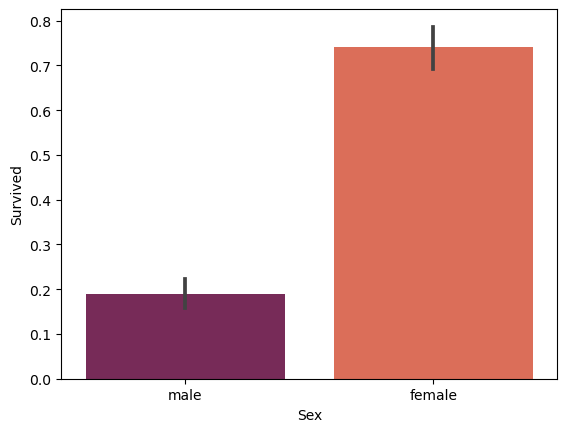

In [321]:
sns.barplot(x='Sex', y='Survived', data=titanic, palette='rocket')

In [322]:
females_survived = titanic['Survived'][titanic['Sex']=='female'].value_counts(normalize=True)[1]
females_survived = round(females_survived,2)
print('Survival rate of females', females_survived)

Survival rate of females 0.74


In [323]:
males_survived = titanic['Survived'][titanic['Sex']=='male'].value_counts(normalize=True)[1]
males_survived = round(males_survived,2)
print('Survival rate of males', males_survived)

Survival rate of males 0.19


<b>There is a higher proability for Females to survive than males.

### Age distribution of Passengers

<AxesSubplot:ylabel='Frequency'>

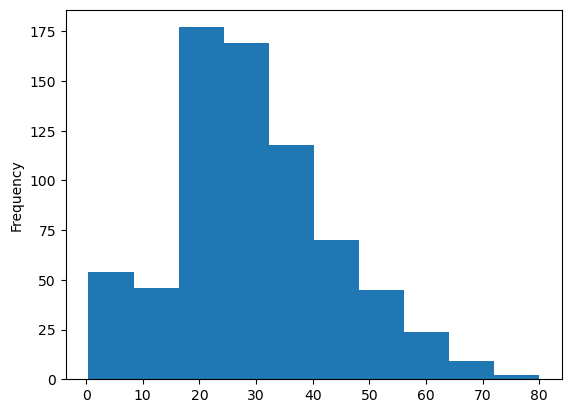

In [324]:
titanic['Age'].plot.hist()

<b>Majority of the passengers are young with more than 50% under 40 years old.

### Age Distribution of Survivals for each Gender

C:\Users\megan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


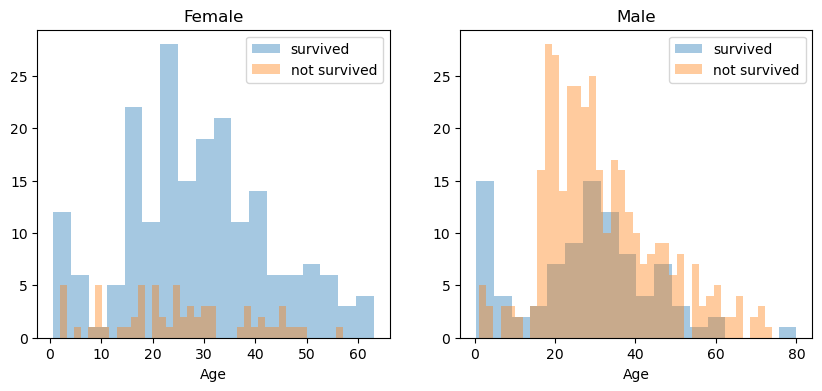

In [325]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
female = titanic[titanic['Sex']=='female']
male = titanic[titanic['Sex']=='male']
ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

<b>It is observed that there is a higher probability of survival for Females between the ages of 14 and 40.
For men, there is a higher probability of survival between the ages of 18 and 40.

### Proportion of Class Types that survived

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

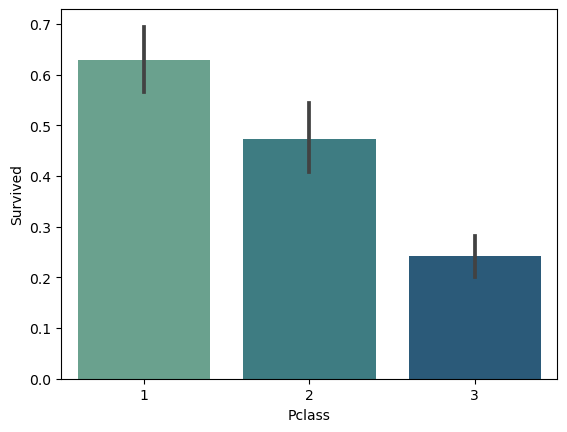

In [326]:
sns.barplot(x='Pclass', y='Survived', data = titanic, palette='crest')

In [327]:
class1_survived = titanic['Survived'][titanic['Pclass']==1].value_counts(normalize=True)[1]
class1_survived = round(class1_survived, 2)
print('Survival rate of Pclass: 1 is', class1_survived)

Survival rate of Pclass: 1 is 0.63


In [328]:
class2_survived = titanic['Survived'][titanic['Pclass']==2].value_counts(normalize=True)[1]
class2_survived = round(class2_survived, 2)
print('Survival rate of Pclass: 2 is', class2_survived)

Survival rate of Pclass: 2 is 0.47


In [329]:
class3_survived = titanic['Survived'][titanic['Pclass']==3].value_counts(normalize=True)[1]
class3_survived = round(class3_survived, 2)
print('Survival rate of Pclass: 3 is', class3_survived)

Survival rate of Pclass: 3 is 0.24


<b>People with higher socioeconomic class had a higher survival rate. 

### Proportion of Sibsp Feature that survived

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

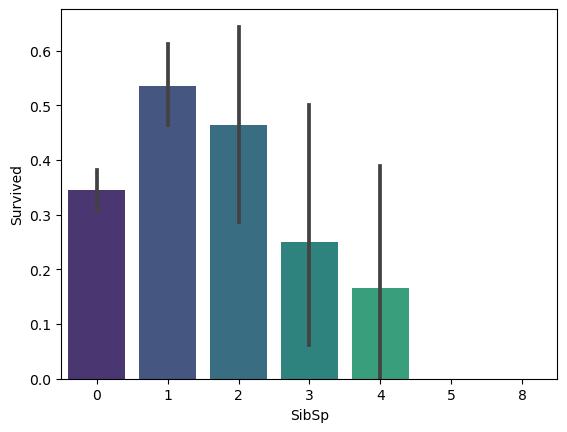

In [330]:
sns.barplot(x='SibSp', y='Survived', data = titanic, palette='viridis')

In [331]:
SibSp0_survived = titanic['Survived'][titanic['SibSp']==0].value_counts(normalize=True)[1]
SibSp0_survived = round(SibSp0_survived, 2)
print('Survival rate of SibSp: 0 is', SibSp0_survived)

Survival rate of SibSp: 0 is 0.35


In [332]:
SibSp1_survived = titanic['Survived'][titanic['SibSp']==1].value_counts(normalize=True)[1]
SibSp1_survived = round(SibSp1_survived, 2)
print('Survival rate of SibSp: 1 is', SibSp1_survived)

Survival rate of SibSp: 1 is 0.54


In [333]:
SibSp2_survived = titanic['Survived'][titanic['SibSp']==2].value_counts(normalize=True)[1]
SibSp2_survived = round(SibSp2_survived, 2)
print('Survival rate of SibSp: 2 is', SibSp2_survived)

Survival rate of SibSp: 2 is 0.46


<b>Overall, people with more sibilings or spouses aboard had a lower likelihood of survival. However, people with no siblings or spouses had a lower survival percentage of 35% than those who with one or two (54% and 46% respectively).

# Data Wrangling

## Handling missing Data for Age column

In [334]:
for dataset in titanic:
    mean = titanic["Age"].mean()
    std = titanic["Age"].std()
    is_null = titanic["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = titanic["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    titanic["Age"] = age_slice
    titanic["Age"] = titanic["Age"].astype(int)
titanic["Age"].isnull().sum()

0

## Handling missing Data for Embarked column

In [335]:
# Find out which group is the most popular
print('Number of people embarking in Southampton (S):')
southampton = titanic[titanic['Embarked']=='S'].shape[0]
print(southampton)

print('Number of people embarking in Cherbourg (C):')
cherbourg = titanic[titanic['Embarked']=='C'].shape[0]
print(cherbourg)

print('Number of people embarking in Queenstown (Q):')
queenstown = titanic[titanic['Embarked']=='Q'].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [336]:
#Replacing the missing values in the Embarked feature with S(most popular)
titanic = titanic.fillna({'Embarked': 'S'})

In [337]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [338]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Dropping irrelavent columns

In [339]:
titanic = titanic.drop('Cabin', axis=1) 
titanic = titanic.drop('PassengerId', axis=1)
titanic = titanic.drop('Ticket', axis=1 )
titanic = titanic.drop('Name', axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


### Mapping Feature to values

In [340]:
sex_mapping = {'male':0, 'female':1}
titanic['Sex'] = titanic['Sex'].map(sex_mapping)

In [341]:
embark_mapping = {'S':0, 'C': 1, 'Q': 2}
titanic['Embarked'] = titanic['Embarked'].map(embark_mapping)

In [342]:
#Fill the missing fare value in test set based on mean fare for that Pclass
for x in range(len(titanic['Fare'])):
  if pd.isnull(titanic['Fare'][x]):
    pclass = titanic['Pclass'][x] #Pclass = 3
    titanic['Fare'][x] = round(titanic[titanic['Pclass']==pclass]['Fare'].mean(),4)

#Map Fare values into groups of numerical values
titanic['FareBand'] = pd.qcut(titanic['Fare'], 4, labels=[1,2,3,4])
titanic['FareBand'] = pd.qcut(titanic['Fare'], 4, labels=[1,2,3,4])

#Drap Fare Values
titanic = titanic.drop(['Fare'], axis = 1)

In [344]:
for dataset in titanic:
    titanic["Age"] = titanic["Age"].astype(int)
    titanic.loc[(titanic['Age'] > 11) & (titanic['Age'] <= 18), 'Age'] = 1
    titanic.loc[(titanic['Age'] > 18) & (titanic['Age'] <= 22), 'Age'] = 2
    titanic.loc[(titanic['Age'] > 22) & (titanic['Age'] <= 27), 'Age'] = 3
    titanic.loc[(titanic['Age'] > 27) & (titanic['Age'] <= 33), 'Age'] = 4
    titanic.loc[(titanic['Age'] > 33) & (titanic['Age'] <= 40), 'Age'] = 5
    titanic.loc[(titanic['Age'] > 40) & (titanic['Age'] <= 66), 'Age'] = 6
    titanic.loc[ titanic['Age'] > 66, 'Age'] = 6

titanic['Age'].value_counts()

6     177
4     169
5     152
3     139
2     127
1      99
9       8
0       7
8       4
11      4
7       3
10      2
Name: Age, dtype: int64

In [345]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FareBand
0,0,3,0,2,1,0,0,1
1,1,1,1,5,1,0,1,4
2,1,3,1,3,0,0,0,2
3,1,1,1,5,1,0,0,4
4,0,3,0,5,0,0,0,2


# Building Machine Learning Models

## Splitting data 

In [346]:
# Dropping irrelevant data columns from features 
features = titanic.drop(['Survived'], axis=1)
##setting variable target to be the intended target of ML model
target = titanic['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=0) 

In [347]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 857 to 684
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    623 non-null    int64   
 1   Sex       623 non-null    int64   
 2   Age       623 non-null    int32   
 3   SibSp     623 non-null    int64   
 4   Parch     623 non-null    int64   
 5   Embarked  623 non-null    int64   
 6   FareBand  623 non-null    category
dtypes: category(1), int32(1), int64(5)
memory usage: 32.4 KB


In [348]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 495 to 64
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    268 non-null    int64   
 1   Sex       268 non-null    int64   
 2   Age       268 non-null    int32   
 3   SibSp     268 non-null    int64   
 4   Parch     268 non-null    int64   
 5   Embarked  268 non-null    int64   
 6   FareBand  268 non-null    category
dtypes: category(1), int32(1), int64(5)
memory usage: 14.1 KB


### Logistic Regession Classification Model

In [349]:
#set a variable for the Logistic Regression classification model 
logmodel = LogisticRegression()
#Fit the train set into the model 
logmodel.fit(X_train, Y_train)
#Make a prediction(predicted y value)
y_pred_logmodel = logmodel.predict(X_test)
#Find the accuracy of this model
accuracy_logmodel = round(metrics.accuracy_score(Y_test, y_pred_logmodel)*100, 2)
print("Accuracy of Logistic Regression is", accuracy_logmodel)

Accuracy of Logistic Regression is 80.97


### KNN classification model 

In [350]:
#set a variable for the KNN classification model 
knn = KNeighborsClassifier()
#Fit the train set into the model 
knn.fit(X_train, Y_train)
#Make a prediction(predicted y value)
y_pred_knn = knn.predict(X_test)
#Find the accuracy of this model
accuracy_knn = round(metrics.accuracy_score(Y_test, y_pred_knn)*100, 2)
print("Accuracy of KNN is", accuracy_knn)

Accuracy of KNN is 76.12


C:\Users\megan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Gaussian Naive Baye classification model

In [351]:
#set a variable for the Gaussian Naive Baye classification model 
gaussian = GaussianNB()
#Fit the train set into the model 
gaussian.fit(X_train, Y_train)
#Make a prediction(predicted y value)
y_pred_gaussian = gaussian.predict(X_test)
#Find the accuracy of this model
accuracy_gaussian = round(metrics.accuracy_score(Y_test, y_pred_gaussian)*100, 2)
print("Accuracy of Gaussian Naive Bayes is", accuracy_gaussian)

Accuracy of Gaussian Naive Bayes is 77.61


### Decision Tree classification model 

In [352]:
#set a variable for the Decision Tree classification model 
decision_tree = DecisionTreeClassifier(random_state=0)
#Fit the train set into the model 
decision_tree.fit(X_train, Y_train)
#Make a prediction(predicted y value)
y_pred_decision_tree = decision_tree.predict(X_test)
#Find the accuracy of this model
accuracy_decision_tree = round(metrics.accuracy_score(Y_test, y_pred_decision_tree)*100, 2)
print("Accuracy of Decision Tree is", accuracy_decision_tree)

Accuracy of Decision Tree is 75.75


### Support Vector Machine classification model 

In [353]:
#set a variable for the Support Vector Machine classification model 
svc = SVC(random_state=0 )
#Fit the train set into the model 
svc.fit(X_train, Y_train)
#Make a prediction(predicted y value)
y_pred_svc = svc.predict(X_test)
#Find the accuracy of this model
accuracy_svc = round(metrics.accuracy_score(Y_test, y_pred_svc)*100, 2)
print("Accuracy of Support Vector Machine is", accuracy_svc)

Accuracy of Support Vector Machine is 80.6


In [354]:
results = pd.DataFrame({
    'Model': ['Logistic Regression',
              'KNN','Gaussian Naive Bayes',
              'Decision Tree','Support Vector Machines', 
              ],
    'Score': [accuracy_logmodel, accuracy_knn, accuracy_gaussian, 
              accuracy_decision_tree, accuracy_svc,]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
80.97,Logistic Regression
80.60,Support Vector Machines
77.61,Gaussian Naive Bayes
76.12,KNN
75.75,Decision Tree


<b>Logistic Regression has the highest accuracy score compared to the other models.

### K-Fold Cross Validation of Logistic Regession Model

In [355]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()#n_estimators=100
scores = cross_val_score(lr, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76190476 0.82539683 0.6984127  0.80645161 0.75806452 0.79032258
 0.79032258 0.82258065 0.80645161 0.87096774]
Mean: 0.7930875576036867
Standard Deviation: 0.04417448290404119


<b>Model has an average accuracy of 79.3% with a standard deviation of 4.9%. Thus, the accuracy of our model can differ by +- 4.9%

### Check for a random person

In [356]:
input_data = (3,0,2,1,0,0,1) #input data excludes survival column
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = logmodel.predict(input_data_reshaped)
#print(prediction)
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

Dead


C:\Users\megan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<b>On running the code, we get the exact same result, as the given in the 1st row in the table.

<b>Thus we can conclude that our model is performing well. THe model can be trained using a bigger dataset to get better results. However, it will be more tedious and time-consuming.